# The curse of dimensionality

In general, we don't want to learn with an arbitrarily large number of features.

We can still improve on the 2 or 3 variables in a lot of 'standard' modeling tasks (e.g. modeling facies from a few logs, or porosity from facies, or permeability from porosity). But the earth is massively high-dimensional... what's the right number, and why does it matter?

- High-dimensional models are hard to explain.
- High-dimensional datasets are hard to visualize.
- We need a lot of data to properly sample the joint distributions of high-dimensional datasets. 
- We're more likely to have redundant features in the data.

## Diagonal of unit square

Space is essentially unbounded:

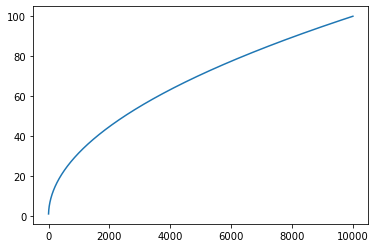

In [3]:
import matplotlib.pyplot as plt
import numpy as np

diag = [np.linalg.norm(np.ones(dim)) for dim in range(1, 10000)]
    
plt.plot(diag)

## Distance between points

Random points in the unit cube become very far apart, and approximately equally distant from each other.

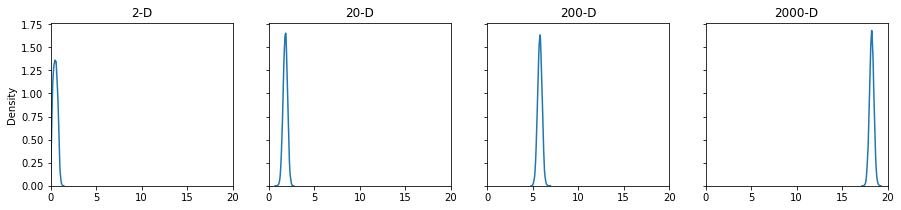

In [7]:
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform

def dists(dim, n=1000, scale=1):
    X = np.random.random(size=(n, dim))
    return pdist(X)

dims = [2, 20, 200, 2000]

fig, axs = plt.subplots(ncols=len(dims), figsize=(15, 3), sharey=True)

for dim, ax in zip(dims, axs):
    d = dists(dim=dim, n=200)
    sns.kdeplot(d, ax=ax)
    ax.set_xlim(0, 20)
    ax.set_title(f'{dim}-D')

## Volume of unit ball

For radius $R$ in $n$ dimensions:
$$ V_n(R) = \frac{\pi^{n/2}}{\Gamma\bigl(\tfrac n2 + 1\bigr)}R^n$$

So for the unit ball, as a fraction of the circumscribed cube:

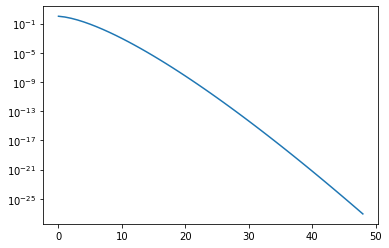

In [14]:
from scipy.special import gamma

def vol(n):
    return np.pi**(n/2) / gamma(n/2 + 1)

d = np.arange(1, 50)
plt.plot(vol(d) / 2**d)
plt.yscale('log')

High-dimensional spheres enclose almost no space. To put it another way, the volume of the hypercube is all in the corners (and a 50-dimensional hypercube has a lot of corners!)

In [17]:
2**50

1125899906842624